In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8a2b5c868cecc3f05dd7641b2deb6f68


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | teguise
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | asau
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | haapiti
Processing Record 6 of Set 1 | togur
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | la union
Processing Record 9 of Set 1 | burnie
Processing Record 10 of Set 1 | burica
City not found. Skipping...
Processing Record 11 of Set 1 | acarau
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | vavuniya
Processing Record 18 of Set 1 | daru
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | alekseyevka
Process

Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | nikolskoye
Processing Record 41 of Set 4 | mandleshwar
Processing Record 42 of Set 4 | halalo
City not found. Skipping...
Processing Record 43 of Set 4 | moose factory
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | twin falls
Processing Record 46 of Set 4 | amderma
City not found. Skipping...
Processing Record 47 of Set 4 | sasebo
Processing Record 48 of Set 4 | maragogi
Processing Record 49 of Set 4 | progreso
Processing Record 50 of Set 4 | caucaia
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | bereznik
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | samusu
City not found. Skipping...
Processing Record 6 of Set 5 | gayny
Processing Record 7 of Set 5 | villa maria
Processing Record 8 of Set 5 | tocopilla
Processing Record 9 of Set 5 | alotau
City not found. Skipping...
Processing Record 10 of Set 5 | vadso
Proc

City not found. Skipping...
Processing Record 26 of Set 8 | talnakh
Processing Record 27 of Set 8 | liminangcong
City not found. Skipping...
Processing Record 28 of Set 8 | jiddah
City not found. Skipping...
Processing Record 29 of Set 8 | emba
Processing Record 30 of Set 8 | bridlington
Processing Record 31 of Set 8 | salisbury
Processing Record 32 of Set 8 | apiai
Processing Record 33 of Set 8 | ijaki
City not found. Skipping...
Processing Record 34 of Set 8 | albanel
Processing Record 35 of Set 8 | manggar
Processing Record 36 of Set 8 | tambun
Processing Record 37 of Set 8 | belyy yar
Processing Record 38 of Set 8 | bella union
Processing Record 39 of Set 8 | nova esperanca
Processing Record 40 of Set 8 | sur
Processing Record 41 of Set 8 | dunda
Processing Record 42 of Set 8 | chornobayivka
Processing Record 43 of Set 8 | calvinia
Processing Record 44 of Set 8 | mahbubabad
Processing Record 45 of Set 8 | anamur
Processing Record 46 of Set 8 | guerrero negro
Processing Record 47 of

Processing Record 10 of Set 12 | waipawa
Processing Record 11 of Set 12 | lagoa
Processing Record 12 of Set 12 | ucluelet
Processing Record 13 of Set 12 | chieti
Processing Record 14 of Set 12 | makakilo city
Processing Record 15 of Set 12 | gravdal
Processing Record 16 of Set 12 | ibotirama
Processing Record 17 of Set 12 | pano polemidia
Processing Record 18 of Set 12 | roslyakovo
Processing Record 19 of Set 12 | imeni zhelyabova
Processing Record 20 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 21 of Set 12 | doha
Processing Record 22 of Set 12 | zlobin
Processing Record 23 of Set 12 | labuhan
Processing Record 24 of Set 12 | roald
Processing Record 25 of Set 12 | sattahip
Processing Record 26 of Set 12 | hot springs
Processing Record 27 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 28 of Set 12 | vao
Processing Record 29 of Set 12 | lagos
Processing Record 30 of Set 12 | ankang
Processing Record 31 of Set 12 | naze
Processing Record 32 of Se

In [11]:
len(city_data)

553

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Teguise,29.06,-13.56,73.40,46,0,9.17,ES,2020-11-01 02:05:07
1,Cape Town,-33.93,18.42,59.00,54,0,11.41,ZA,2020-11-01 02:05:07
2,Asau,46.43,26.40,46.40,81,69,20.80,RO,2020-11-01 02:05:07
3,Saskylakh,71.92,114.08,-6.43,86,14,8.25,RU,2020-11-01 02:05:07
4,Haapiti,-17.57,-149.87,80.60,69,40,10.29,PF,2020-11-01 02:05:08
5,Togur,58.36,82.83,33.66,92,100,11.18,RU,2020-11-01 02:05:08
6,Khatanga,71.97,102.50,-4.18,88,78,9.84,RU,2020-11-01 02:05:08
7,La Union,-5.40,-80.75,65.57,77,40,12.08,PE,2020-11-01 02:05:08
8,Burnie,-41.07,145.92,62.01,54,68,4.00,AU,2020-11-01 02:05:06
9,Acarau,-2.89,-40.12,78.78,85,38,12.95,BR,2020-11-01 02:03:55


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Teguise,ES,2020-11-01 02:05:07,29.06,-13.56,73.40,46,0,9.17
1,Cape Town,ZA,2020-11-01 02:05:07,-33.93,18.42,59.00,54,0,11.41
2,Asau,RO,2020-11-01 02:05:07,46.43,26.40,46.40,81,69,20.80
3,Saskylakh,RU,2020-11-01 02:05:07,71.92,114.08,-6.43,86,14,8.25
4,Haapiti,PF,2020-11-01 02:05:08,-17.57,-149.87,80.60,69,40,10.29
5,Togur,RU,2020-11-01 02:05:08,58.36,82.83,33.66,92,100,11.18
6,Khatanga,RU,2020-11-01 02:05:08,71.97,102.50,-4.18,88,78,9.84
7,La Union,PE,2020-11-01 02:05:08,-5.40,-80.75,65.57,77,40,12.08
8,Burnie,AU,2020-11-01 02:05:06,-41.07,145.92,62.01,54,68,4.00
9,Acarau,BR,2020-11-01 02:03:55,-2.89,-40.12,78.78,85,38,12.95


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

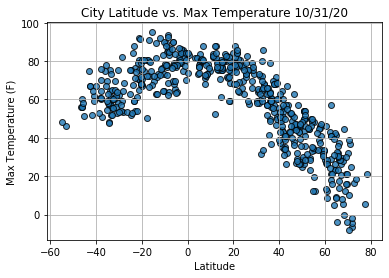

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

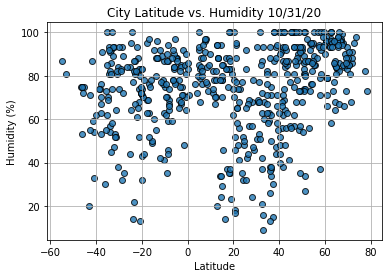

In [22]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

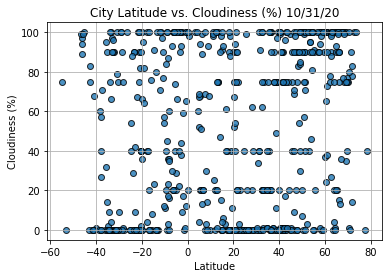

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

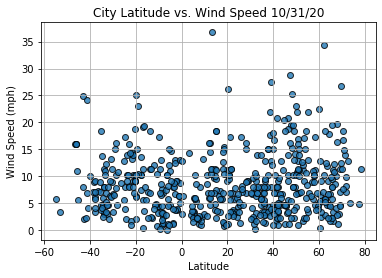

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()